Load the appropriate libraries as below.

In [580]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
import statistics as st
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Load the dataset. This dataset gives a number of variables for the unnamed formulations of petrol.

In [581]:
# Load the dataset
ing = pd.read_csv('ingredient.csv')

Proceed to understand the dataset by checking the first 10 rows.

In [582]:
# Check the first 10 rows of the dataset
ing.head(10)

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
5,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
7,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00
8,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00
9,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00


The first 10 rows of data from the dataset are shown above.

We will now display the data frame shape below.

In [583]:
# Display data frame shape in rows and columns
print('Data Frame shape = ' ,ing.shape)

Data Frame shape =  (214, 9)


The data frame shape shows (214, 9), which means there are 214 rows of data and 9 attributes.

Next, we will be displaying the size of data frame.

In [584]:
# Display data frame size
print('Number of rows times number of columns')
print('Data Frame size = ', ing.size)

Number of rows times number of columns
Data Frame size =  1926


The size of the data frame is shown above as the data frame size is also equivalent to number of rows times number of columns, which is 1926.

Data types for each of the attributes will be displayed below.

In [585]:
# Display data types for each of the attributes in the dataset
ing.dtypes

a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
g    float64
h    float64
i    float64
dtype: object

From above, we can understand that all of the attributes in the dataset are float.

In [586]:
# Display data frame info
print(ing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB
None


A summary statistic of the palm data will be shown by using describe() function below.

In [587]:
# Analyze Descriptive Statistics
ing.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


As seen above, we can understand that the numerical variables are continuous instead of discrete.

# Data Pre-processing

### CHECK MISSING VALUES

In [588]:
# Check misisng/null values in the dataset
missing_values_count = ing.isna().sum()

# Display the missing/null values in the 9 attributes
missing_values_count[0:9]

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

In [589]:
# Check the total missing values in our data
total_cells = np.product(ing.shape)
total_missing = missing_values_count.sum()

# Percentage of missing data
print('Percentage of missing data: ', (total_missing/total_cells)*100 , '%')

Percentage of missing data:  0.0 %


<AxesSubplot:>

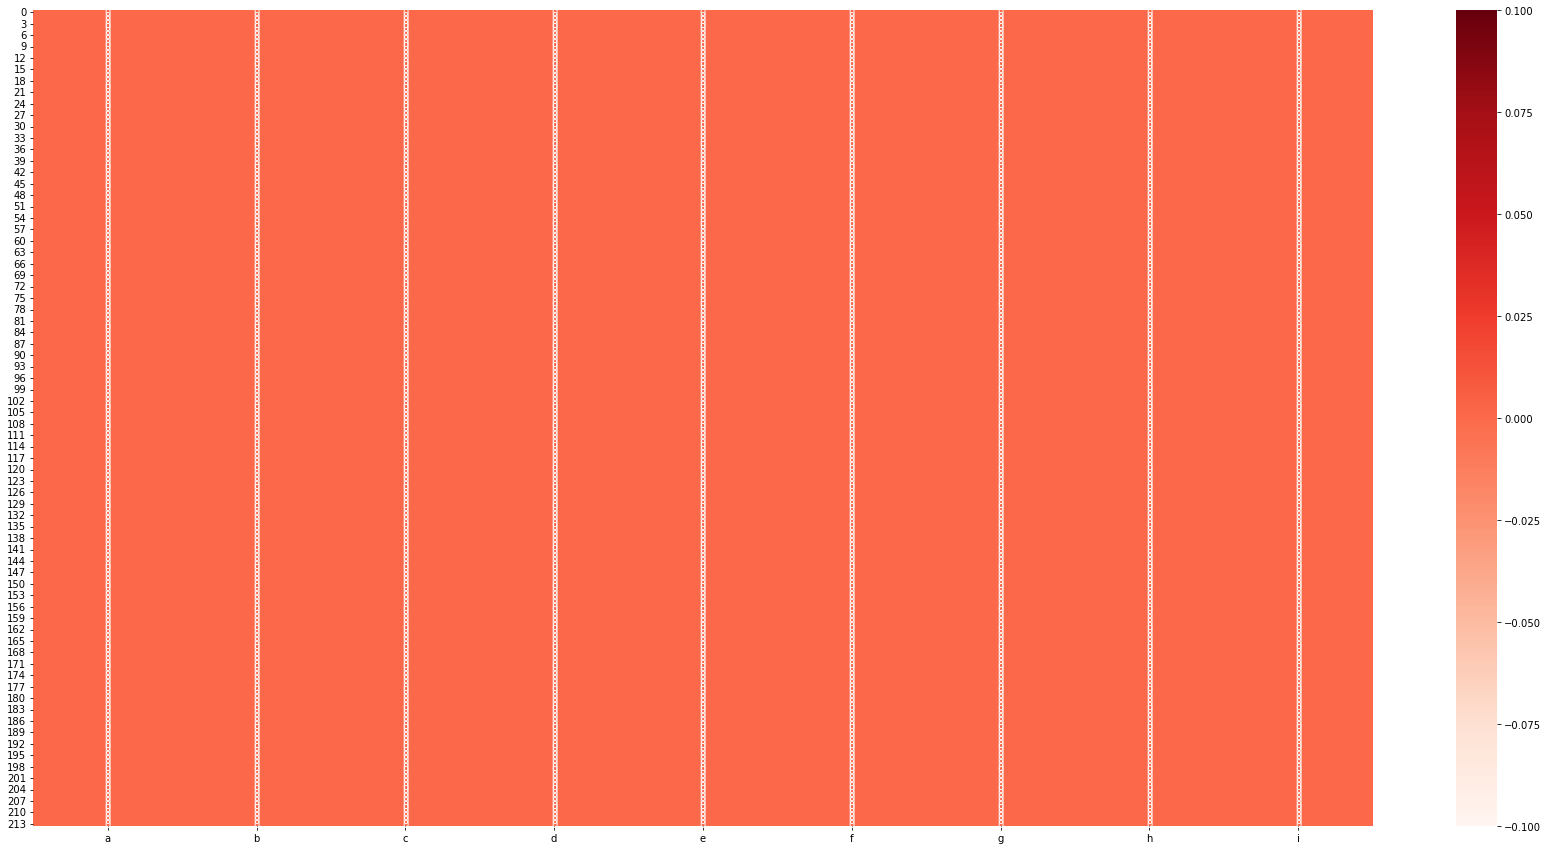

In [590]:
fig,ax=plt.subplots(figsize=(30,15))
sns.heatmap(ing.isnull(), annot=True,cmap="Reds")

There are no missing values for each of the attribute.

### CHECK DUPLICATE VALUES

In [591]:
# Check for duplicate values

print("There are {} duplicated values in data frame".format(ing.duplicated().sum()))

There are 1 duplicated values in data frame


In [592]:
duplicated = ing[ing.duplicated(keep = False)]
duplicated.head()

,a,b,c,d,e,f,g,h,i
105,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0
183,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0


In [593]:
# Removing duplicated values
ing.drop_duplicates(inplace = True)

In [594]:
# Check the number of duplicated values in the data frame
print("There is {} duplicated values in data frame".format(ing.duplicated().sum()))

There is 0 duplicated values in data frame


In [595]:
# Check total rows and columns of the dataset
print('Number of rows in the dataset: ',ing.shape[0])
print('Number of columns in the dataset: ',ing.shape[1])

Number of rows in the dataset:  213
Number of columns in the dataset:  9


From above, we can understand that a row from the dataset has been removed for being duplicated.

## Findings

- There are no missing values.
- There's one duplicated values and is removed from the dataset.
- The values for each attributes are numerical and continous.

# Analyze the numerical variables

In [596]:
# Display the list of numerical variables
num_variables = [var for var in ing.columns if ing[var].dtypes != '0']
print('Number of numerical variables in the dataset: ', len(num_variables))

Number of numerical variables in the dataset:  9


In [597]:
# Display the first 10 rows of the numerical variables
ing[num_variables].head(10)

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
5,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
7,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00
8,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00
9,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00


In [598]:
# Calculate and display the mean for all of numerical attributes
print("Mean for the attributes below:- \n")

print("a:  % s" % round(st.mean(ing["a"]),2))
print("b:  % s" % round(st.mean(ing["b"]),2))
print("c:  % s" % round(st.mean(ing["c"]),2))
print("d:  % s" % round(st.mean(ing["d"]),2))
print("e:  % s" % round(st.mean(ing["e"]),2))
print("f:  % s" % round(st.mean(ing["f"]),2))
print("g:  % s" % round(st.mean(ing["g"]),2))
print("h:  % s" % round(st.mean(ing["h"]),2))
print("i:  % s" % round(st.mean(ing["i"]),2))

Mean for the attributes below:- 

a:  1.52
b:  13.4
c:  2.68
d:  1.45
e:  72.66
f:  0.5
g:  8.95
h:  0.18
i:  0.06


In [599]:
# Calculate and display the median for all of numerical attributes
print("Median for the attributes below:- \n")

print("a:  % s" % round(st.median(df["a"]),2))
print("b:  % s" % round(st.median(df["b"]),2))
print("c:  % s" % round(st.median(df["c"]),2))
print("d:  % s" % round(st.median(df["d"]),2))
print("e:  % s" % round(st.median(df["e"]),2))
print("f:  % s" % round(st.median(df["f"]),2))
print("g:  % s" % round(st.median(df["g"]),2))
print("h:  % s" % round(st.median(df["h"]),2))
print("i:  % s" % round(st.median(df["i"]),2))

Median for the attributes below:- 

a:  1.52
b:  13.3
c:  3.48
d:  1.36
e:  72.79
f:  0.56
g:  8.6
h:  0.0
i:  0.0


In [600]:
# Calculate and display the standard deviation for all of numerical attributes
print("Standard Deviation for the attributes below:- \n")

print("a:  % s" % round(st.stdev(ing["a"]),2))
print("b:  % s" % round(st.stdev(ing["b"]),2))
print("c:  % s" % round(st.stdev(ing["c"]),2))
print("d:  % s" % round(st.stdev(ing["d"]),2))
print("e:  % s" % round(st.stdev(ing["e"]),2))
print("f:  % s" % round(st.stdev(ing["f"]),2))
print("g:  % s" % round(st.stdev(ing["g"]),2))
print("h:  % s" % round(st.stdev(ing["h"]),2))
print("i:  % s" % round(st.stdev(ing["i"]),2))

Standard Deviation for the attributes below:- 

a:  0.0
b:  0.82
c:  1.44
d:  0.5
e:  0.77
f:  0.65
g:  1.43
h:  0.5
i:  0.1


In [601]:
# Calculate and display the variance for all of numerical attributes
print("Variance for the attributes below:- \n")

print("a:  % s" % round(st.variance(ing["a"]),2))
print("b:  % s" % round(st.variance(ing["b"]),2))
print("c:  % s" % round(st.variance(ing["c"]),2))
print("d:  % s" % round(st.variance(ing["d"]),2))
print("e:  % s" % round(st.variance(ing["e"]),2))
print("f:  % s" % round(st.variance(ing["f"]),2))
print("g:  % s" % round(st.variance(ing["g"]),2))
print("h:  % s" % round(st.variance(ing["h"]),2))
print("i:  % s" % round(st.variance(ing["i"]),2))

Variance for the attributes below:- 

a:  0.0
b:  0.67
c:  2.08
d:  0.25
e:  0.6
f:  0.43
g:  2.03
h:  0.25
i:  0.01


## Findings

- The difference between the mean and median for each attribute are not significant.
- The attributes that has the highest variance are c & g.

# Analyze Distributions

Displaying the unique values of each column in ascending order.

In [602]:
# Display the unique values of each column in ascending order

for column in ing.columns:
    print("The unique values of the column '{}'=\n{}\n".format(column, sorted(df[column].unique())))

The unique values of the column 'a'=
[1.51115, 1.51131, 1.51215, 1.51299, 1.51316, 1.51321, 1.51409, 1.51508, 1.51514, 1.51531, 1.51545, 1.51556, 1.51567, 1.51569, 1.51571, 1.51574, 1.51588, 1.51589, 1.5159, 1.51592, 1.51593, 1.51594, 1.51596, 1.51602, 1.51605, 1.51609, 1.5161, 1.51613, 1.51617, 1.51618, 1.51623, 1.51625, 1.51627, 1.51629, 1.51631, 1.5164, 1.51643, 1.51645, 1.51646, 1.51651, 1.51652, 1.51653, 1.51655, 1.51658, 1.5166, 1.51662, 1.51663, 1.51665, 1.51666, 1.51667, 1.5167, 1.51673, 1.51674, 1.51683, 1.51685, 1.51687, 1.51689, 1.5169, 1.51694, 1.51707, 1.51708, 1.51709, 1.51711, 1.51719, 1.5172, 1.51721, 1.51727, 1.5173, 1.51732, 1.51735, 1.51736, 1.51742, 1.51743, 1.51747, 1.51748, 1.5175, 1.51751, 1.51753, 1.51754, 1.51755, 1.51756, 1.51761, 1.51763, 1.51764, 1.51766, 1.51768, 1.51769, 1.51775, 1.51776, 1.51778, 1.51779, 1.51783, 1.51784, 1.51786, 1.51789, 1.51793, 1.51796, 1.51797, 1.518, 1.51806, 1.51808, 1.51811, 1.51813, 1.51818, 1.5182, 1.51824, 1.51829, 1.51831, 1.

In [603]:
# Check number of discrete variables
discrete_variables = [var for var in num_variables if len(ing[var].unique())<20]

print('Number of discrete variables in the dataset: ', len(discrete_variables))

Number of discrete variables in the dataset:  0


From the above, we can ensure that there are no discrete variables to be found in the dataset.

In [604]:
# A security of copy of the original dataframe before further processing
df = df.copy()

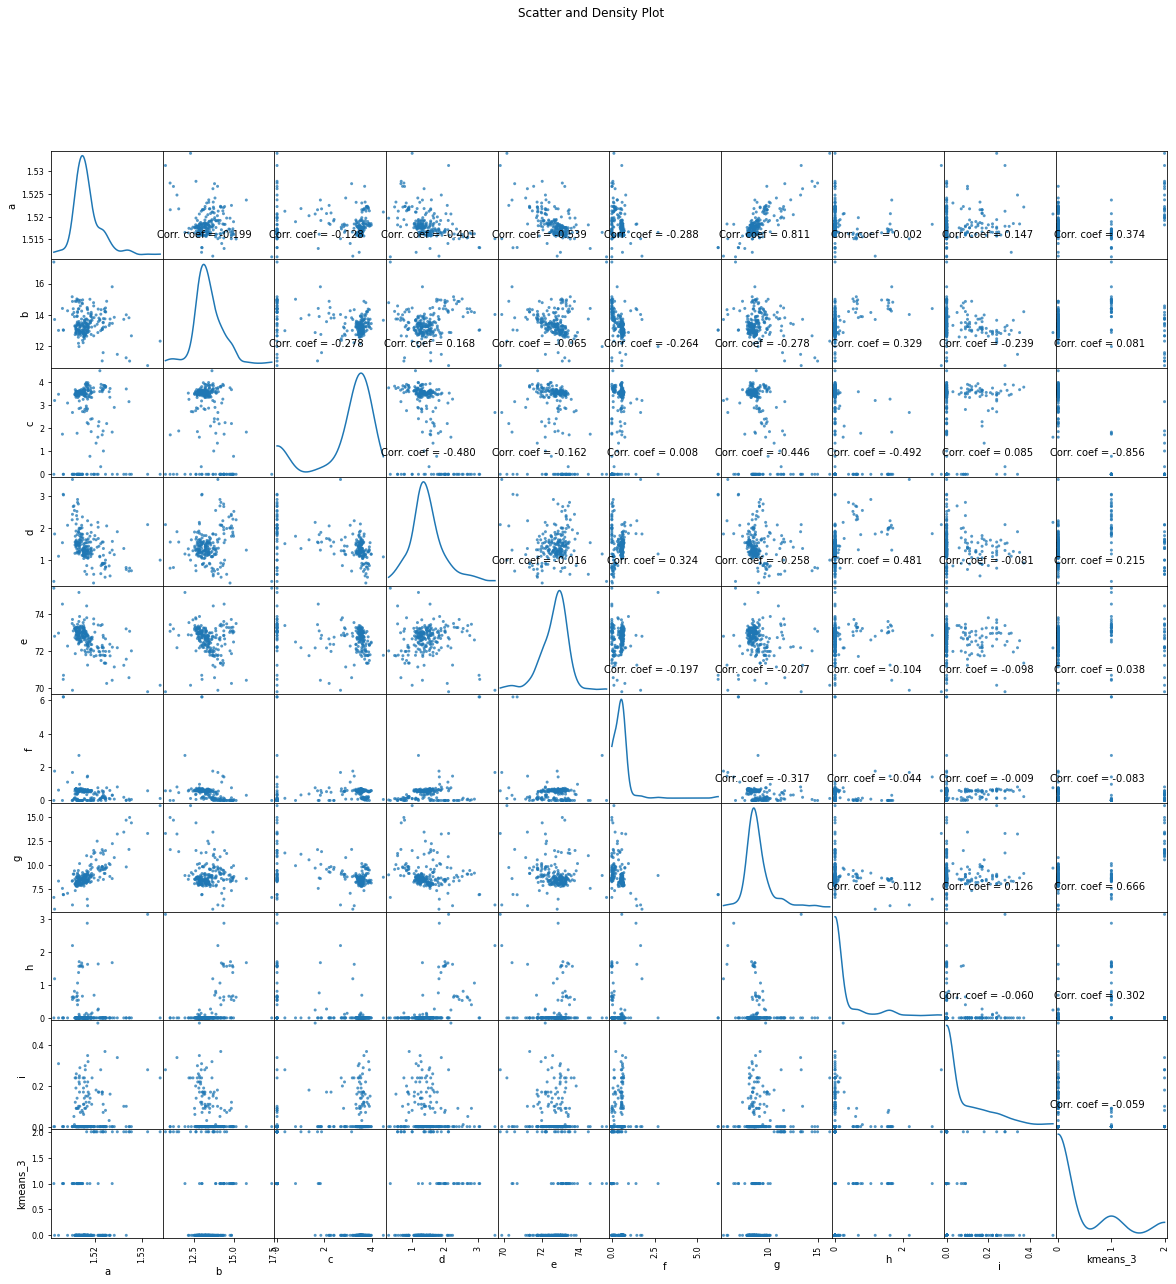

In [605]:
# Display scatter & density plots
plotScatterMatrix(df, 20, 10)

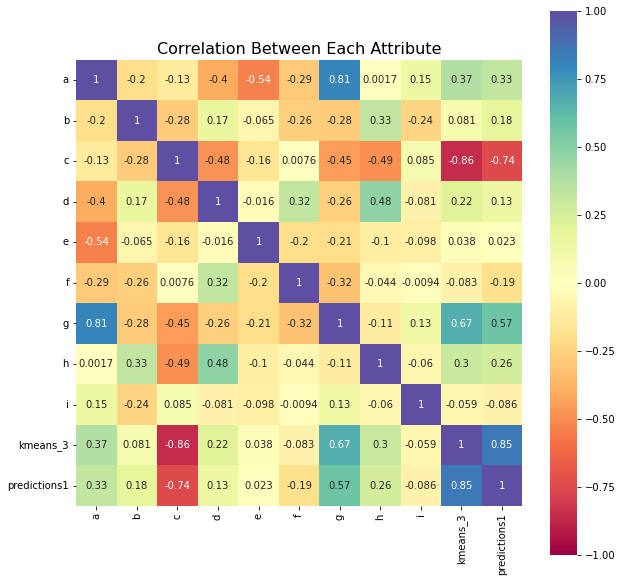

In [606]:
# Plot a heatmap to show the correlation between each attribute
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), vmax=1, vmin=(-1), square=True, annot=True, cmap = 'Spectral')
plt.title('Correlation Between Each Attribute', fontsize = 16)
plt.show()

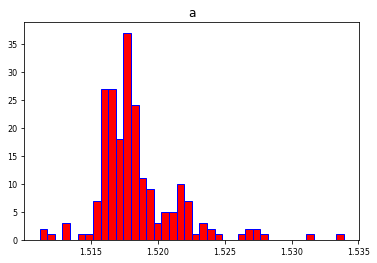

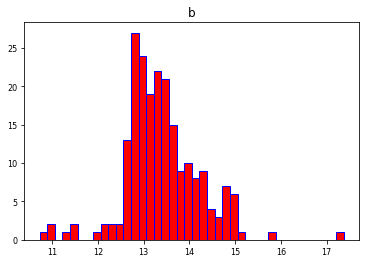

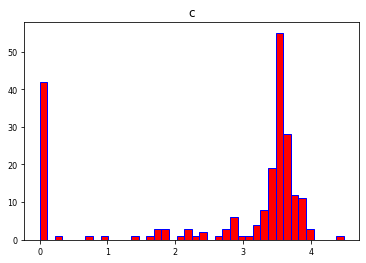

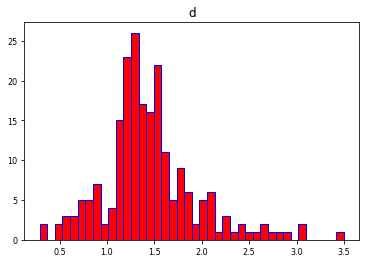

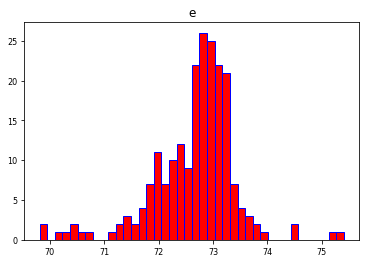

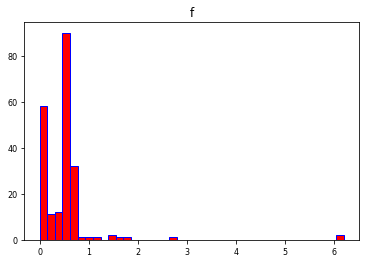

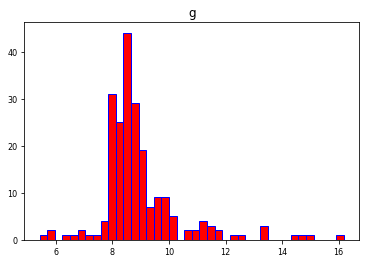

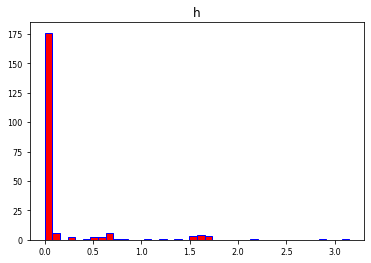

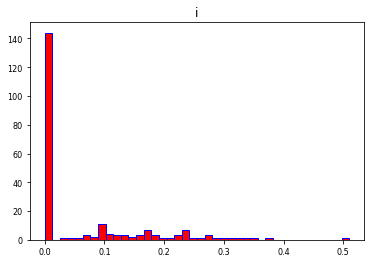

In [607]:
# Method to analyse each variables using histogram
def analyse_variables(df, var):
    
    df[var].hist(bins=40,edgecolor='b',linewidth=1.0,xlabelsize=8,ylabelsize=8,grid=False,color='red')
    plt.title(var)
    plt.show()
    
for var in num_variables:
    analyse_variables(ing, var)

## Findings

As seen on the above heatmap:
- It is noticeable that the highest correlated attributes are a & g, and the lowest being a & e.

# Visualize Outliers

<AxesSubplot:ylabel='i'>

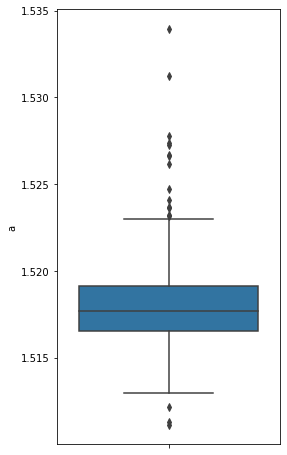

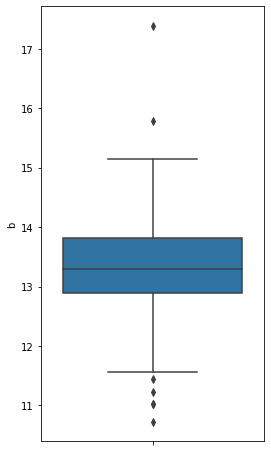

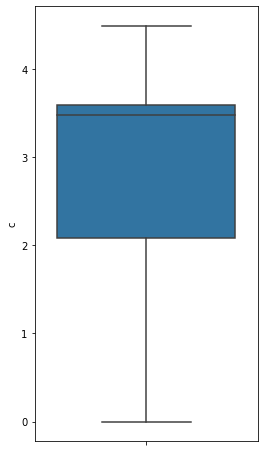

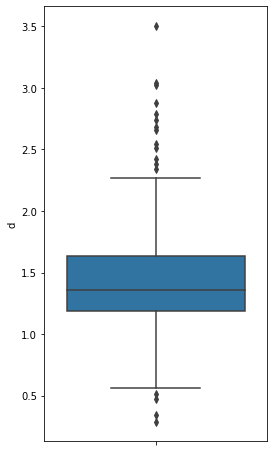

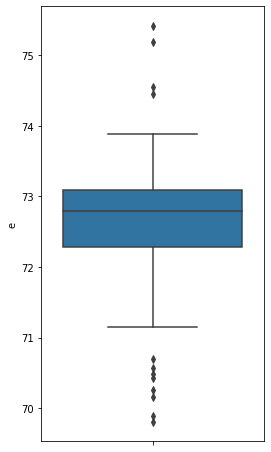

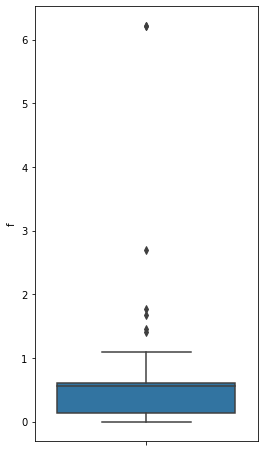

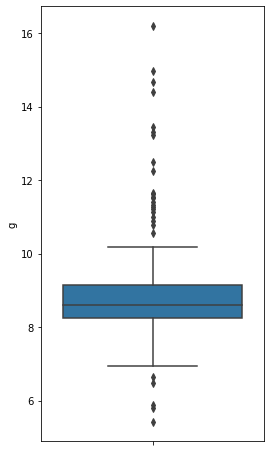

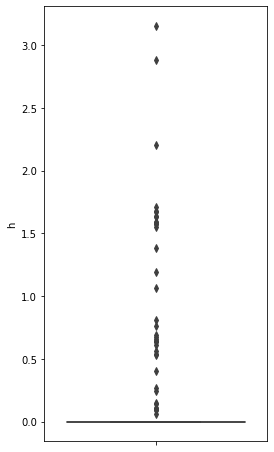

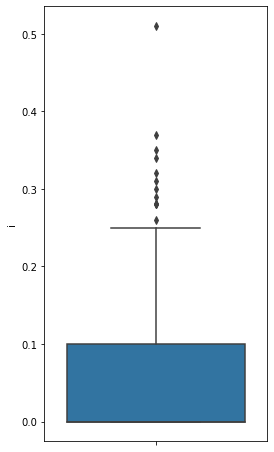

In [608]:
# Creating boxplots to visualize the outliers

plt.figure(figsize = (4,8))
sns.boxplot(y = df.a)

plt.figure(figsize = (4,8))
sns.boxplot(y = df.b)

plt.figure(figsize = (4,8))
sns.boxplot(y = df.c)

plt.figure(figsize = (4,8))
sns.boxplot(y = df.d)

plt.figure(figsize = (4,8))
sns.boxplot(y = df.e)

plt.figure(figsize = (4,8))
sns.boxplot(y = df.f)

plt.figure(figsize = (4,8))
sns.boxplot(y = df.g)

plt.figure(figsize = (4,8))
sns.boxplot(y = df.h)

plt.figure(figsize = (4,8))
sns.boxplot(y = df.i)

## Findings

There are no significant outlier problem in the dataset.

# K-Means Clustering

In [609]:
Y = ing.copy()

In [610]:
 def optimise_k_means(data, max_k):
        means = []
        inertias = []
        
        for k in range(1, max_k):
            kmeans = KMeans(n_clusters=k)
            kmeans.fit(Y)
            means.append(k)
            inertias.append(kmeans.inertia_)
            
        # Generate elbow plot to find k value
        fig = plt.subplots(figsize=(10,5))
        plt.plot(means, inertias, 'o-')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Inertia')
        plt.title('Elbow Method')
        plt.grid(True)
        plt.show()

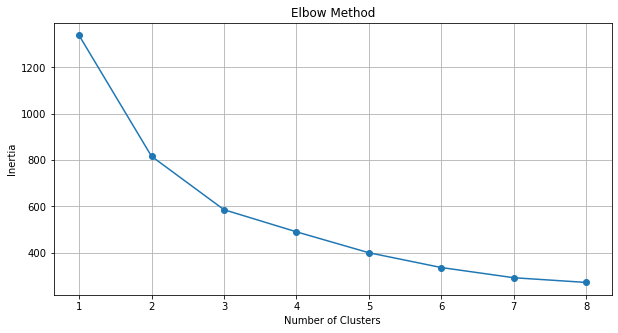

In [611]:
optimise_k_means(Y,9)

## Findings

The Elbow Method graph above shows that there are 3 clusters.

In [612]:
# Create KMeans object
kmeans = KMeans (n_clusters=3, init='k-means++', max_iter=300, n_init=10,random_state=0)

# Plotting the Results

In [613]:
# Assign clusters to cluster centers
clusters = kmeans.cluster_centers_

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [ ]:
# Print out the cluster centers
print(clusters)

In [ ]:
# Fit the KMeans object to the dataset
y_km = kmeans.fit_predict(Y)

In [ ]:
y_km

In [ ]:
len(y_km)

In [614]:
ing['pred1'] = pd.DataFrame(y_km)
ing.pred1.value_counts()

2.0    136
0.0     44
1.0     32
Name: pred1, dtype: int64

In [615]:
ing.head()

,a,b,c,d,e,f,g,h,i,pred1
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,2.0
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,0.0
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,0.0
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,2.0
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,2.0


In [616]:
Y.head(10)

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
5,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
7,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00
8,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00
9,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00


# Feature Scaling

In [617]:
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)

In [618]:
Y_scaled[:5]

array([[-0.32974224, -0.47141793,  0.5976527 ,  0.48612788,  0.09703652,
         0.06311174, -0.36138732, -0.35380764,  0.13067999],
       [ 4.26402702, -3.28211985, -1.86017161,  1.31481317, -3.68446925,
         0.1244944 ,  3.05505951,  5.98327826,  2.28762323],
       [ 1.5375093 , -0.11547751,  0.62542472, -1.27230189, -0.86129029,
        -0.58140614,  0.85475527, -0.35380764, -0.28016634],
       [-0.22068153, -1.03601308,  0.58376668, -0.03937987,  0.64095173,
         0.10914874, -0.29109006, -0.35380764, -0.58830108],
       [-0.07196238,  0.03180818,  0.90314498, -0.54467578, -0.21377218,
         0.1244944 , -0.56524938, -0.35380764, -0.58830108]])

In [619]:
y_km = kmeans.fit_predict(Y_scaled)

In [620]:
y_km

array([2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2,
       0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2,
       1, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1], dtype=int32)

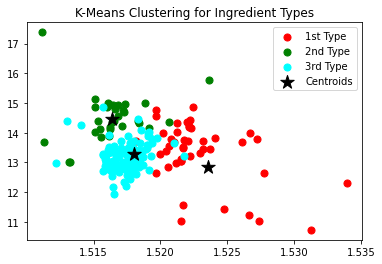

In [621]:
# Visualize clusters and the centroids

plt.scatter(Y.iloc[y_km == 0,0], Y.iloc[y_km == 0,1], s=50, color='red', label='1st Type')
plt.scatter(Y.iloc[y_km == 1,0], Y.iloc[y_km == 1,1], s=50, color='green', label='2nd Type')
plt.scatter(Y.iloc[y_km == 2,0], Y.iloc[y_km == 2,1], s=50, color='cyan', label='3rd Type')

plt.scatter(clusters[0][0], clusters[0][1], marker='*', s=200, color='black', label='Centroids')
plt.scatter(clusters[1][0], clusters[1][1], marker='*', s=200, color='black')
plt.scatter(clusters[2][0], clusters[2][1], marker='*', s=200, color='black')

plt.title("K-Means Clustering for Ingredient Types")
plt.legend()
plt.show()

## Findings

From the K-Means scatter plot, we can see that there are 3 types of formulations of the petrol that are significantly different from each other. The centroids are also plotted to help determine the distinctive number of formulations that are present in the dataset. 